In [1]:
import readline
readline.clear_history()

In [2]:
#Import packages
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

# Draw inline
%matplotlib inline


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.plotly as py
import cufflinks as cf
cf.go_offline()

# Read files

In [8]:
#read files, join - MUST HAVE FILES IN LOCAL DIRECTORY
df = pd.read_csv("/Users/rehanarajwani/Documents/Data - Amazon/Kindle_Store_5_overall_5.csv")

In [4]:
print(df)

             asin   helpful  overall  \
0      B00CFL8CVG    [2, 4]        1   
1      B00CFLG5NI    [0, 0]        1   
2      B00CFLGM2M    [2, 2]        1   
3      B00CFLW85C    [0, 0]        1   
4      B00CFM59IO    [4, 5]        1   
5      B00CFM59IO    [4, 5]        1   
6      B00CFM59IO    [0, 0]        1   
7      B00CFPY98M    [1, 3]        1   
8      B00CFQJCOC    [1, 1]        1   
9      B00CFRGIEI   [3, 88]        1   
10     B00CFT4NXY    [1, 6]        1   
11     B00CFT4NXY    [0, 1]        1   
12     B00CFT4NXY    [2, 3]        1   
13     B00CFTDHBI    [0, 0]        1   
14     B00CFUN6WM    [0, 1]        1   
15     B00CFV2GJU    [0, 0]        1   
16     B00CFV2GJU    [1, 2]        1   
17     B00CFWBKZA   [9, 10]        1   
18     B00CG3N2E0    [1, 1]        1   
19     B00CG5WVVS    [0, 1]        1   
20     B00CG5WVVS    [1, 2]        1   
21     B00CG69E0I    [1, 1]        1   
22     B00CG69E0I    [6, 7]        1   
23     B00CG69E0I    [1, 1]        1   


In [5]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

#plt.legend(title="Legend Title")
#plt.xlabel("xLabel")

6.0
4.0


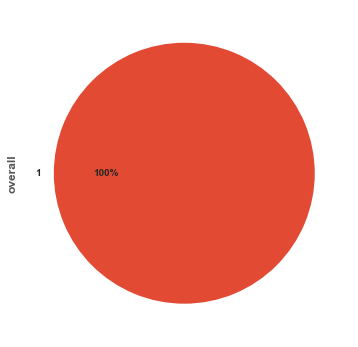

In [6]:
df.overall.value_counts().plot(kind='pie', autopct='%1.0f%%')

lets check what is the rating percentage

In [7]:
type(df.reviewText)

pandas.core.series.Series

In [9]:
df = df[~df['reviewText'].isnull()]

In [10]:
df["reviewText"]= df["reviewText"].astype(str)

In [11]:
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')  
    return ReviewText

In [12]:
df['reviewText'] = preprocess(df['reviewText'])

In [12]:
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger

df['polarity'] = df['reviewText'].map(lambda text: TextBlob(text).sentiment.polarity)
df['review_len'] = df['reviewText'].astype(str).apply(len)
df['word_count'] = df['reviewText'].apply(lambda x: len(str(x).split()))

# To preview whether the sentiment polarity score works, we randomly select 5 reviews with the highest sentiment polarity score (1):

In [13]:
print('5 random reviews with the highest positive sentiment polarity: \n')
cl = df.loc[df.polarity == 1, ['reviewText']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the highest positive sentiment polarity: 

I couldnt connect with this book at all!! I loved MBK series but this book didnt do it for me!!
It did not seem to enable me to gain control of the Kindle, but I sshall keep trying and hope for the best.
To be continued movies and books do not agree with me. I thought the story was great up to the TO THe TO be continued . Therefore I will not read another one of David Wiseharts books.  And that's that !
This was going to be a great read until I got into it just as I did it ended with no warning. Sucked!
The premise is good but the book read poorly,A lot of grammar mistakes and I don't believe it was proof read!!!


# Then randomly select 5 reviews with the most neutral sentiment polarity score (zero):

In [14]:
print('5 random reviews with the most neutral sentiment(zero) polarity: \n')
cl = df.loc[df.polarity == 0, ['reviewText']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the most neutral sentiment(zero) polarity: 

The words in the stories don't flow together. There is no uses of names just Dom one and Dom two so you can't follow it. I did t even finish.
I would not recommend this book it was way to short not enough detail. Everything just happens nothing leads up to it or explained with details.
I didn't get into the story or premise. I didn't even finish it, so I do not recommend this to anyone.
It says its chapter 13, the cover also says chapter 13 but it lists it as I bought it when I bought chapter 12. Its still technically chapter 12
I truly tried to read this book but I just couldn't get into it. Lost me from the start so I finally just gave up.


# There were only 2 reviews with the most negative sentiment polarity score:

In [15]:
print('2 reviews with the most negative polarity: \n')
cl = df.loc[df.polarity == -0.97500000000000009, ['reviewText']].sample(2).values
for c in cl:
    print(c[0])

2 reviews with the most negative polarity: 

Was very disappointed with this so called book.  No story, no plot and no ending.  Will not read anymore of his work.
I was very disappointed about the ending of the book too. I though it was about Evie and Jay so how did it end with Cythina not Evie. I hope there is another installment to it with Jay and Evie. I


In [16]:
df['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')

In [17]:
df['overall'].iplot(
    kind='hist',
    xTitle='rating',
    linecolor='black',
    yTitle='count',
    title='Review Rating Distribution')

In [18]:
df['review_len'].iplot(
    kind='hist',
    bins=250,
    xTitle='review length',
    linecolor='black',
    yTitle='count',
    title='Review Text Length Distribution')

In [19]:
df['word_count'].iplot(
    kind='hist',
    bins=100,
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    title='Review Text Word Count Distribution')

# The distribution of top unigrams before removing stop words

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['reviewText'], 20)
for word, freq in common_words:
    print(word, freq)


the 101130
to 57552
and 56394
it 44306
this 40327
of 39659
was 32791
is 31473
book 28945
that 26457
in 24810
not 23151
for 19835
but 18647
with 15101
her 14468
have 13563
you 13551
story 13408
she 13271


In [21]:
df1 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df1.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review before removing stop words')

# The distribution of top unigrams after removing stop words

In [22]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['reviewText'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df2.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review after removing stop words')


book 28945
story 13408
just 12507
read 11767
like 10422
author 7902
time 6513
really 6359
don 6206
good 5480
books 5470
34 5383
characters 5323
reading 5092
didn 5005
did 4749
way 3774
know 3668
love 3585
sex 3504


# The distribution of top bigrams before removing stop words

In [23]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['reviewText'], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df3.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review before removing stop words')


this book 12810
of the 9162
it was 7530
in the 6359
the book 6029
the story 5236
to be 5105
the author 5032
to the 3828
this is 3712
and the 3670
it is 3154
to read 3105
the first 2954
the characters 2700
book was 2605
this was 2558
for the 2418
if you 2409
with the 2402


# The distribution of top bigrams after removing stop words

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['reviewText'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review after removing stop words')


read book 37849
highly recommend 29458
recommend book 24570
loved book 24121
book series 23177
really enjoyed 22847
love story 22420
great book 20804
wait read 20650
reading book 20540
looking forward 19996
great read 19376
book read 19076
ve read 17690
honest review 16320
short story 15732
great story 15297
story line 15080
look forward 14837
read books 14783


# The distribution of Top trigrams before removing stop words

In [25]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['reviewText'], 20)
for word, freq in common_words:
    print(word, freq)
df5 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df5.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in review before removing stop words')

this book was 1801
this book is 1391
of the book 1306
in this book 1021
it was free 795
one of the 752
of this book 740
of the story 680
don waste your 678
the main character 651
waste of time 627
waste your time 591
there is no 586
could have been 585
in the book 575
the story was 560
this is the 554
there was no 527
this book and 520
the first book 514


# The distribution of Top trigrams after removing stop words

In [26]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['reviewText'], 20)
for word, freq in common_words:
    print(word, freq)
df6 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df6.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in review after removing stop words')


don waste time 493
waste time money 267
don waste money 216
did like book 125
didn make sense 118
book ve read 106
couldn finish book 106
book poorly written 101
wanted like book 96
really wanted like 94
felt like reading 92
book waste time 90
didn like book 87
blah blah blah 86
complete waste time 83
books ve read 80
waste time reading 79
exchange honest review 71
total waste time 70
got book free 68
